# Task 1 : Prediction Using Supervised ML

##To predict the percentage of a student based on number of study hours.

##Dataset link: http://bit.ly/w-data

## Batch: GRIPAUGUST21

##Author: Arpit Somani

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
%matplotlib inline

In [2]:
# Reading data
url = "http://bit.ly/w-data"
data = pd.read_csv(url)

In [3]:
# Check the dataset 
data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
# The shape of dataset 
data.shape

(25, 2)

In [5]:
# Check the info of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
# Checking null sum of values in dataset
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [7]:
# check the description of dataset
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Data Visualization

Now let's plot a graph of our data, for more insights.

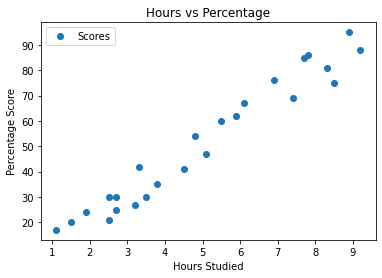

In [8]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

  **we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

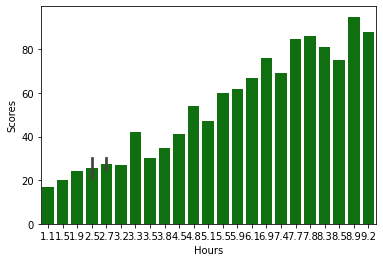

In [9]:
sns.barplot(x='Hours',y='Scores',data=data, color='green')

## Linear Regression Model
Now we prepare the data.

In [10]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20,random_state=101)

## Training the model

In [12]:
from sklearn.linear_model import LinearRegression
linearRegressor= LinearRegression()
linearRegressor.fit(X_train, y_train)
y_predict= linearRegressor.predict(X_train)

regressor = LinearRegression()
regressor.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

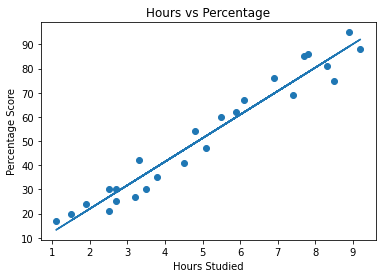

In [13]:
line = regressor.coef_*X + regressor.intercept_
# Scatter plot for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')
plt.show()

### Checking the accuracy scores 

In [14]:
print('Test Score')
print(regressor.score(X_test, y_test))
print('Training Score')
print(regressor.score(X_train, y_train))

Test Score
0.9377551740781869
Training Score
0.954930331163377


In [15]:
print(y_test)
print(y_predict)

[30 85 35 69 60]
[49.23200315 33.65871187 85.24523925 52.15199527 13.21876706 61.88530232
 26.84539693 46.31201104 17.11208988 69.67194797 28.79205834 36.57870398
 83.29857784 34.63204257 28.79205834 89.13856207 78.43192431 92.05855419
 21.0054127  59.93864091]


As you can see above y_test and y_predict not having same length.
Arrays must all be same length.

In [16]:
data= pd.DataFrame({'Original': y_test,'Predicted': y_predict[:5]}) #using [:5] for making array of equal length
data

,Original,Predicted
0,30,49.232003
1,85,33.658712
2,35,85.245239
3,69,52.151995
4,60,13.218767


###What will be predicted score if a student studies for 9.25 hrs/ day?

In [17]:
#Let's predict the score for 9.25 hours
print('Score of student who studied for 9.25 hours/day', regressor.predict([[9.25]]))

Score of student who studied for 9.25 hours/day [92.54521954]


### Model Evaluation Metrics

In [18]:
#Checking the error/efficiency of model
mean_squ_error = mean_squared_error(y_test, y_predict[:5])
mean_abs_error = mean_absolute_error(y_test, y_predict[:5])
print("Mean Squred Error:",mean_squ_error)
print("Mean absolute Error:",mean_abs_error)

Mean Squred Error: 1600.5441797422889
Mean absolute Error: 36.88955364182182
